In [1]:
%matplotlib inline

In [2]:
from importsForTesting import *

In [3]:
histo, _ = np.histogram(ggr, range=(0,1), bins=255)

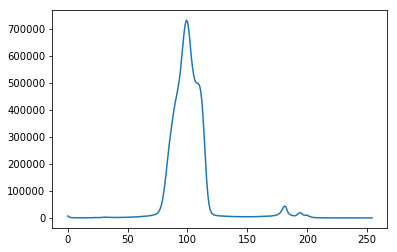

In [4]:
plt.plot(histo)

In [12]:
maxes = argrelmin(-histo)

In [13]:
maxes

(array([  7,  10,  14,  23,  31,  47,  99, 145, 147, 150, 159, 167, 181,
        194, 199, 221, 228, 231, 235, 237, 240, 243]),)

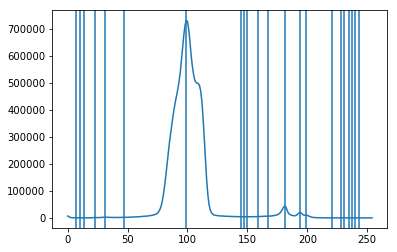

In [14]:
plt.plot(histo)
for entry in maxes[0]:
    plt.axvline(x=entry)

In [15]:
maxes2 = find_peaks_cwt(histo, widths=np.arange(1, 10))

In [16]:
maxes2

array([  1,  23,  32,  99, 100, 112, 149, 181, 196])

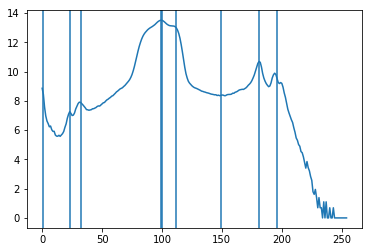

In [20]:
plt.plot(np.log(histo + 1))
for entry in maxes2:
    plt.axvline(x=entry)

In [21]:
X, Y = ggr.shape

/Users/Spencer/anaconda/envs/python3_5/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


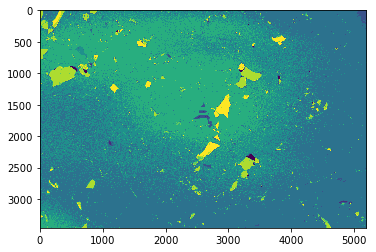

In [31]:
toCluster = skimage.img_as_ubyte(ggr)
clustered = np.zeros_like(toCluster)
for x in range(X):
    for y in range(Y):
        current = toCluster.item(x, y)
        differences = maxes2 - current
        index = np.argmin(np.abs(differences))
        clustered[x,y] = index
plt.imshow(clustered)
        

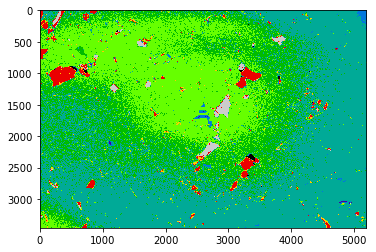

In [32]:
plt.imshow(clustered, cmap='nipy_spectral')

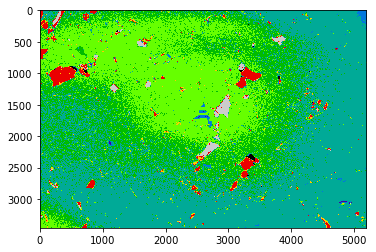

In [40]:
clustered2 = np.copy(toCluster)
for pixelValue in np.nditer(clustered2, op_flags=['readwrite']):
    differences = maxes2 - pixelValue
    index = np.argmin(np.abs(differences))
    pixelValue[...] = index
    
plt.imshow(clustered2, cmap='nipy_spectral')

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [45]:
clustered3 = np.zeros_like(toCluster)

In [47]:
for i in range(len(maxes2)):
    maskx, masky = (toCluster > maxes2[i]).nonzero()
    clustered3[maskx, masky] = i

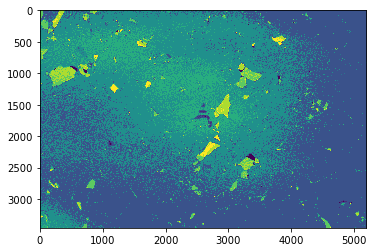

In [48]:
plt.imshow(clustered3)

why is this so much faster?!?!

In [59]:
maxes3 = find_peaks_cwt(histo, widths=np.arange(2, 10))

In [60]:
maxes3

array([  1,  32,  47,  99, 100, 112, 149, 181, 196])

In [51]:
clustered4 = np.zeros_like(toCluster)

In [52]:
for i in range(len(maxes3)):
    maskx, masky = (toCluster > maxes2[i]).nonzero()
    clustered4[maskx, masky] = i

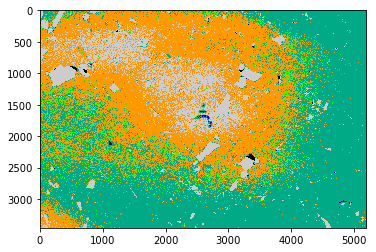

In [54]:
plt.imshow(clustered4, cmap='nipy_spectral')

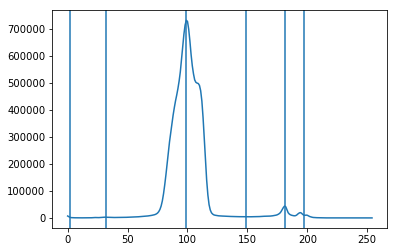

In [56]:
plt.plot(histo)
for entry in maxes3:
    plt.axvline(x=entry)

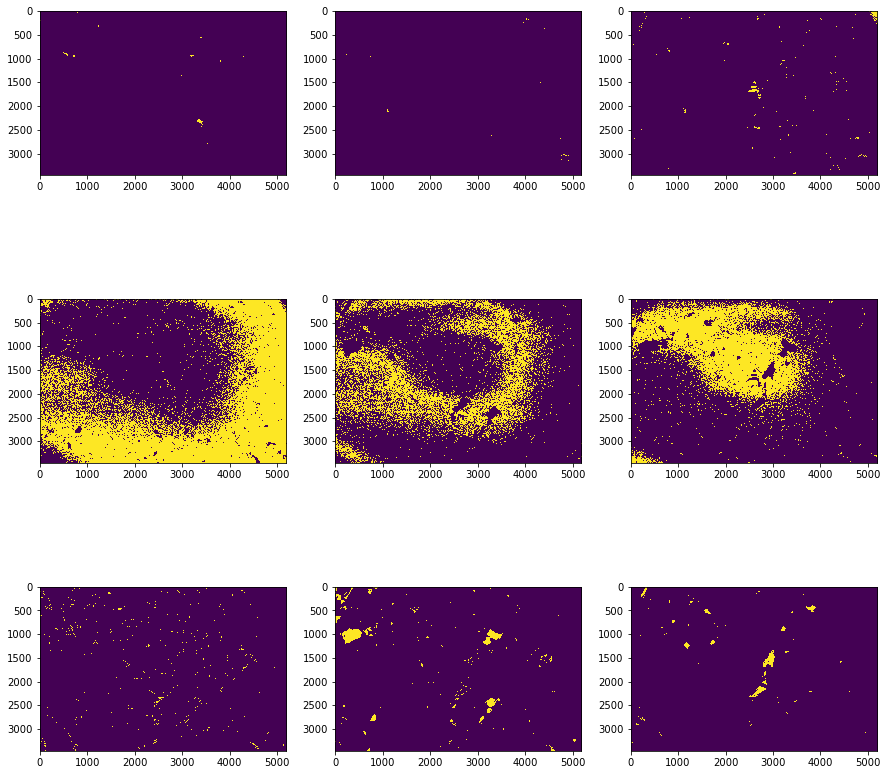

In [65]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(clustered2 == i)

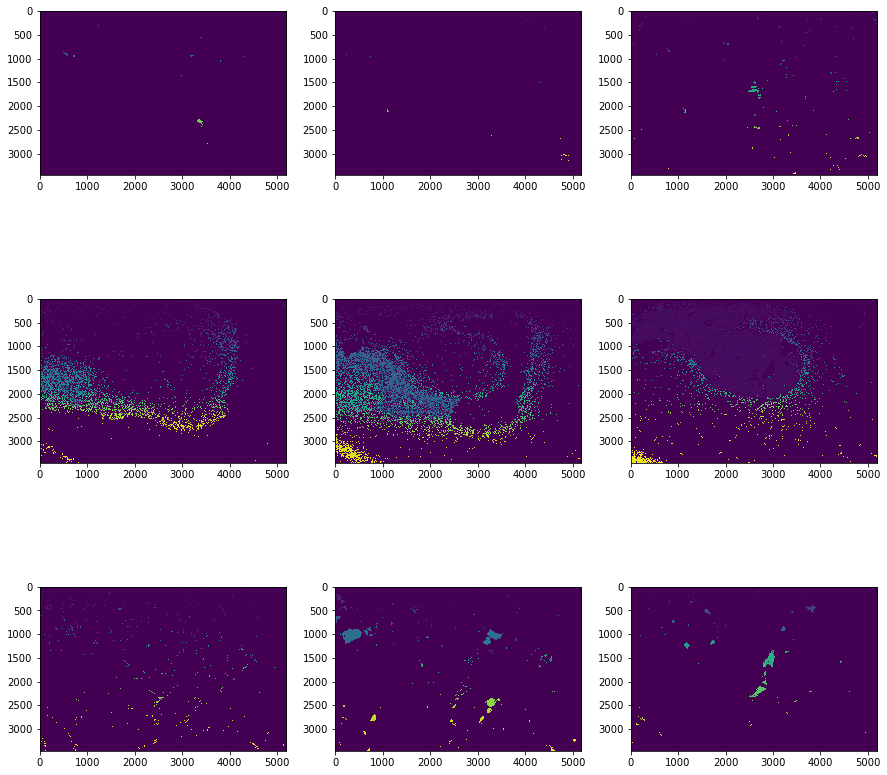

In [83]:
labels = []
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
for i in range(len(axes)):
    labels.append( label(clustered2 == i, connectivity=1))
    axes[i].imshow(labels[i])

In [84]:
regionpropslist = [regionprops(label) for label in labels]

In [85]:
listOfRegionLists = []
for props in regionpropslist:
    currentList = []
    listOfRegionLists.append(currentList)
    for region in props:
        if region.area > 1000:
            currentList.append(region)
            
            

In [86]:
import matplotlib.patches as mpatches

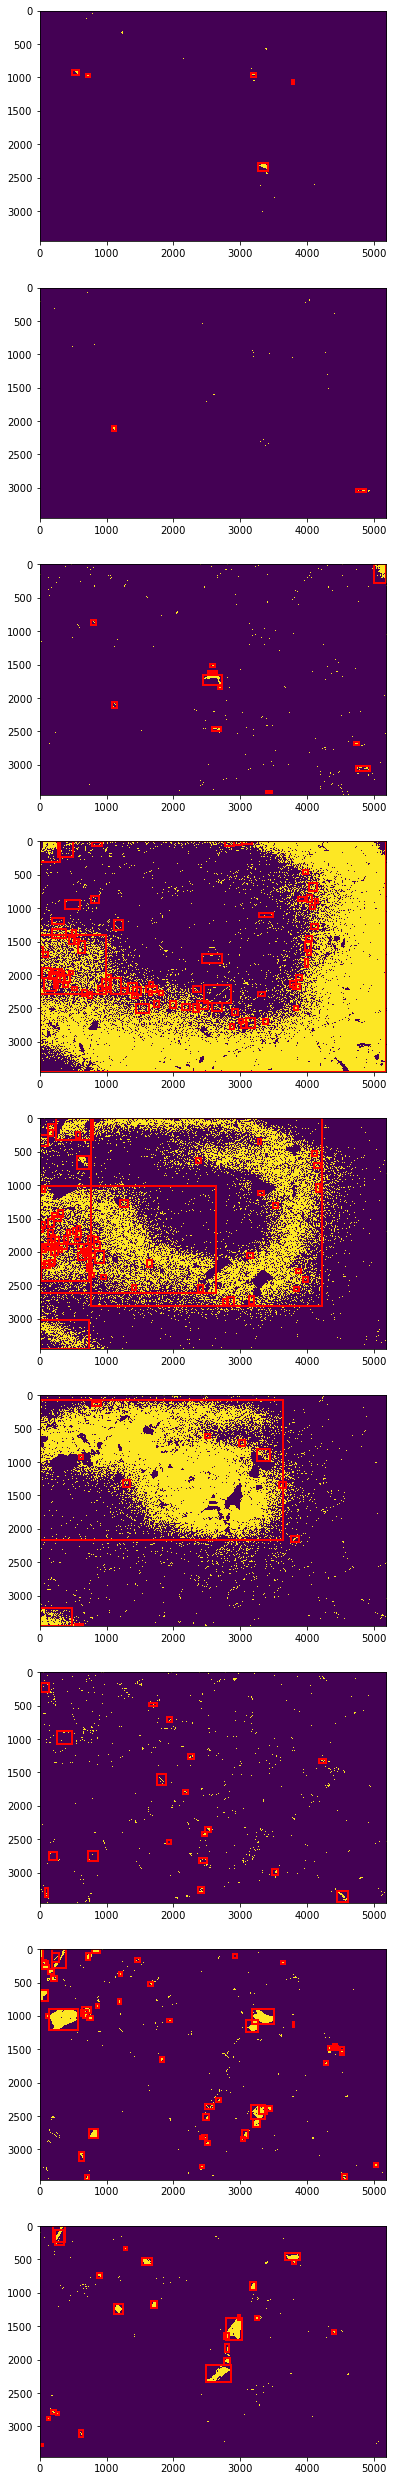

In [87]:
fig, axes = plt.subplots(9, 1, figsize=(15, 45))
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(clustered2 == i)
    for region in listOfRegionLists[i]:
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        axes[i].add_patch(rect)

The question is now, the primarily background channels have some real pieces, but they also have a lot of noise, so how to separate the two?

In [88]:
%ls

515/
Adlm/
Alpha/
AnacondaProjects/
AndroidStudioProjects/
Applications/
Blender/
Calibre Library/
ClionProjects/
ClusterByHistogram.ipynb
Desktop/
Documents/
Downloads/
Dropbox/
DubHacks/
Google
Google Drive/
IHaskell/
IdeaProjects/
Kyle's Stuff/
Library/
Movies/
Music/
NULL
OneDrive/
Other/
Paramation/
Pictures/
Pictures with Mike/
PieceRecognizerNB1.ipynb
Public/
PycharmProjects/
R-Projects/
SimpleThresholdDemonstration-Copy1.ipynb
SimpleThresholdDemonstration.ipynb
SpencerSub/
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
anaconda/
bla
everything
extendedScript.R
extendedScript2.R
git/
gitignore/
hw1.db
hw1.sql
relational-causal-inference/
test1
